In [1]:
from sage.graphs.trees import TreeIterator

In [2]:
T = []

In [3]:
def isomorphic_test(X, n, cnt):
    phi_X = X.charpoly()
    phi = []
    matrices = []
    
    # precompute the characteristic polynomial
    for a in range(n):
        X_a = (X.delete_rows([a])).delete_columns([a])
        phi.append(X_a.charpoly())   
        matrices.append(X_a);
            
    # compute set of cospectral vertices with a given vertex
    for a in range(n):
        for b in range(a+1, n):
            if(phi[a]!=phi[b]): continue  # a and b are not cospectral 
                
            X_ab = X.delete_rows([a, b]).delete_columns([a, b])
            phi_ab = X_ab.charpoly()

            g = phi_X.gcd(phi_ab)
            f = phi_X / g
            f1 = f.derivative(x)

            val = f.gcd(f1)

            if val.derivative() != 0: continue  # a and b are not parallel
            
            G_a = Graph(matrices[a])
            G_b = Graph(matrices[b])
            
            if(G_a.is_isomorphic(G_b)): continue  # G\a ~ G\b

            # Verify if phi(T1) / phi(T1 + a) = phi(T2) / phi(T2 + b)            
            G = Graph(X)
                
            not_in_T1a = []
            for c in range(n):
                if (G.distance(a, c) > G.distance(b, c) or G.distance(b, c) < G.distance(b, a)):
                    not_in_T1a.append(c)
            T1a = X.delete_rows(not_in_T1a).delete_columns(not_in_T1a)

            not_in_T2b = []
            for c in range(n):
                if (G.distance(b, c) > G.distance(a, c) or G.distance(a, c) < G.distance(a, b)):
                    not_in_T2b.append(c)
            T2b = X.delete_rows(not_in_T2b).delete_columns(not_in_T2b)
            
            T1 = X.delete_rows(not_in_T1a + [a]).delete_columns(not_in_T1a + [a])
            T2 = X.delete_rows(not_in_T2b + [b]).delete_columns(not_in_T2b + [b])
            
            equal_ratio = False
            if (T1.charpoly() * T2b.charpoly() == T2.charpoly() * T1a.charpoly()):
                equal_ratio = True
            
            # Save things 
            print(f"At graph {cnt}, G\\{a} is not isomorphic to G\\{b}, ratio satisfied = {equal_ratio}")
            
            T.append((Graph(X), a, b, equal_ratio))

            '''
            if not equal_ratio:
                P = Graph(X).plot(title=f'Vertices {a} and {b} are strongly cospectral')
                P.save(f"data/examples_for_chris/tree_{len(T)}_vts_{n}.png")
            else:
                P = Graph(X).plot(title=f'Equal Ratio phi(T1) / phi(T1 + a) = phi(T2) / phi(T2 + b) - Vertices {a} and {b} are strongly cospectral')
                P.save(f"data/examples_for_chris/equal_ratio_tree_{len(T)}_vts_{n}.png")                
            '''

In [4]:
def support(X, a):
    eps = 1e-8
    eig = X.eigenvalues()
    X_a = (X.delete_rows([a])).delete_columns([a])
    eig_a = X_a.eigenvalues()
    #print(eig_a)
    D = dict()
    for i in range(len(eig)):
        D[i] = [0, 0]
        for j in range(len(eig)):
            if (abs(eig[i] - eig[j]) < eps):
                D[j][0] += 1
                break
    for i in range(len(eig_a)):
        for j in range(len(eig)):
            if (abs(eig_a[i] - eig[j]) < eps):
                D[j][1] += 1
                break
  
    #print(D)
    supp = []
    for key, val in D.items():
        if val[0] > val[1]:
            supp.append(eig[key])
    return supp

In [47]:
n = 9
r = 8
T = []
for i in range(n, n+r):
    print(f"Trying graphs with {i} vertices")
    cnt = 0
    for t in TreeIterator(i):
        cnt+=1
        A = t.adjacency_matrix()
        
        #P = t.plot()
        #P.show()
        isomorphic_test(A, i, cnt)

Trying graphs with 9 vertices
At graph 3, G\1 is not isomorphic to G\6, ratio satisfied = False
Trying graphs with 10 vertices
Trying graphs with 11 vertices
At graph 40, G\1 is not isomorphic to G\7, ratio satisfied = False
Trying graphs with 12 vertices
At graph 5, G\4 is not isomorphic to G\7, ratio satisfied = False
At graph 61, G\1 is not isomorphic to G\10, ratio satisfied = False
At graph 101, G\0 is not isomorphic to G\3, ratio satisfied = False
At graph 331, G\0 is not isomorphic to G\1, ratio satisfied = True
Trying graphs with 13 vertices
At graph 36, G\4 is not isomorphic to G\8, ratio satisfied = False
At graph 43, G\1 is not isomorphic to G\9, ratio satisfied = False
At graph 220, G\0 is not isomorphic to G\2, ratio satisfied = True
At graph 414, G\2 is not isomorphic to G\7, ratio satisfied = False
At graph 414, G\3 is not isomorphic to G\11, ratio satisfied = True
At graph 414, G\4 is not isomorphic to G\12, ratio satisfied = True
At graph 531, G\1 is not isomorphic to 

In [49]:
save(T, f"data/examples_for_chris/tree_examples")

In [5]:
T = load(f"data/examples_for_chris/tree_examples")

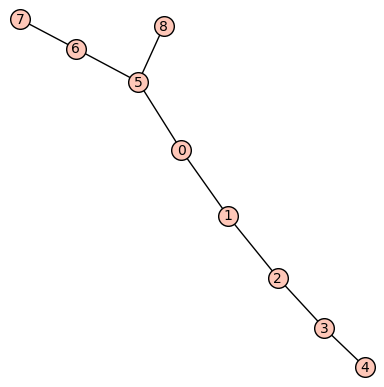

In [7]:
T[0][0].plot().show()

In [16]:
for G, a, b, flag in T:
    sup = support(G.adjacency_matrix(), a)
    sup.sort()
    near_eig = sup[1] - sup[0] < 1
    if near_eig:
        print("Near eigenvalues")
    else:
        G.plot().show()
        print("EIGENVALUES APPART")

Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalues
Near eigenvalu

In [31]:
G = Graph({0:[1, 2, 3, 4]})
X = G.adjacency_matrix()
X.eigenvalues()

[2, -2, 0, 0, 0]

In [36]:
support(X, 0)

[0, 0, 0, 0]
{0: [1, 0], 1: [1, 0], 2: [3, 4], 3: [0, 0], 4: [0, 0]}


[2, -2]

In [30]:
X

[0 1 1 1 1]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]

In [15]:
G = Graph({0:[1, 2, 3, 4, 5, 6]})

support(G.adjacency_matrix(), 1)

[0, -2.449489742783178?, 2.449489742783178?]

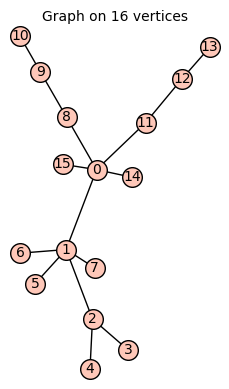

In [10]:
G

In [17]:
support(G.adjacency_matrix(), 1)

[1,
 -1,
 -1.866198262509023?,
 1.210755880959192?,
 2.655442381549831?,
 -2.655442381549831?,
 -1.210755880959192?,
 1.866198262509023?]